In [2]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import box
import geodatasets

In [4]:
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop")) # got to find a dataset for Alabama Counties to apply this logic.
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries")).to_crs(chicago.crs)
#https://alabamamaps.ua.edu/contemporarymaps/alabama/counties/index.html
# Create a subset of the chicago data that is just the South American continent
near_west_side = chicago[chicago["community"] == "NEAR WEST SIDE"]

# Create a custom polygon
polygon = box(-87.8, 41.90, -87.5, 42)
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=chicago.crs)

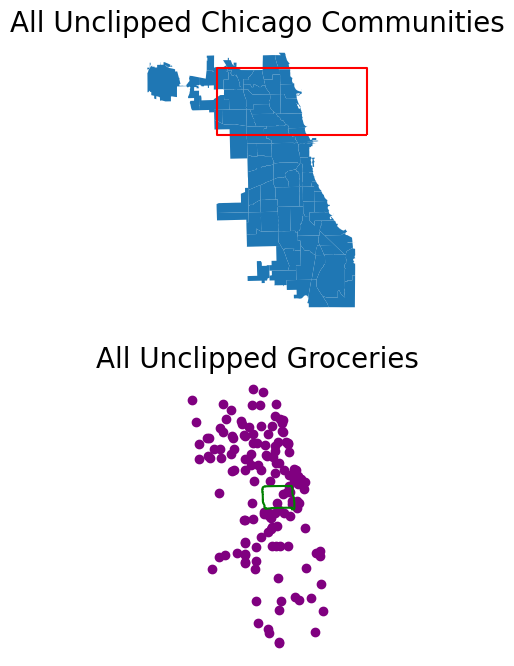

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
chicago.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
near_west_side.boundary.plot(ax=ax2, color="green")
groceries.plot(ax=ax2, color="purple")
ax1.set_title("All Unclipped Chicago Communities", fontsize=20)
ax2.set_title("All Unclipped Groceries", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()


In [8]:
Alabama_counties = geopandas.read_file(geodatasets.get_path('/Users/coreymcdaniels/Desktop/Al Authors Local /Al-authors/Alabama_Counties.geojson')) # Found data set for Alabama Counties 
# Might need to change the file path. 
# Create a custom polygon
#polygon = box(-87.8, 41.90, -87.5, 42)
#poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=Alabama_counties.crs)

ValueError: No matching item found for the query '/Users/coreymcdaniels/Desktop/Al Authors Local /Al-authors/Alabama_Counties.geojson'.

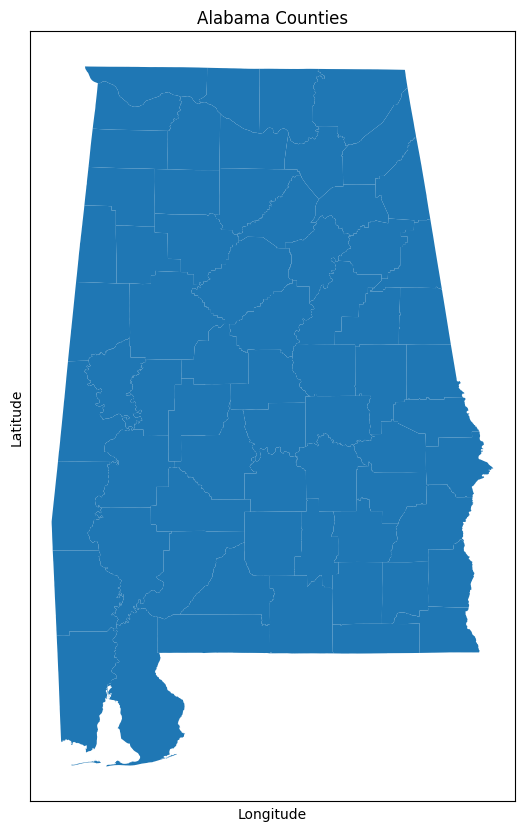

In [4]:
import geopandas 
import matplotlib.pyplot as plt
from shapely.geometry import box

# Path to the GeoJSON file
file_path = '/Users/coreymcdaniels/Desktop/Al Authors Local /Al-authors/Alabama_Counties.geojson'

# Read the GeoJSON file into a GeoDataFrame
alabama_counties = geopandas.read_file(file_path)

# Plot the counties
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
alabama_counties.plot(ax=ax)

# Add titles and axes labels if desired
ax.set_title('Alabama Counties')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Remove the x and y axis for a cleaner look
ax.set_xticks([])
ax.set_yticks([])
## What I want is to likely create a custom polygon to highlight a specific county.
# Create a custom polygon
polygon = box(-87.8, 41.90, -87.5, 42)
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=alabama_counties.crs)


In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
alabama_counties.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
ax1.set_title("All Unclipped Chicago Communities", fontsize=20)
ax2.set_title("All Unclipped Groceries", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()
# Need to figure out what I would like to do with the data. Maybe a 3D plot or representation of the data.

NameError: name 'plt' is not defined

In [6]:
import geopandas as gpd
import plotly.graph_objects as go
import numpy as np

# Load your GeoJSON file
file_path = '/Users/coreymcdaniels/Desktop/Al Authors Local /Al-authors/Alabama_Counties.geojson'
alabama_counties = gpd.read_file(file_path)

# Initialize the Figure object here
fig = go.Figure()

for _, row in alabama_counties.iterrows():
    geom = row.geometry
    
    # Handle both Polygon and MultiPolygon geometries
    if geom.type == 'Polygon':
        polygons = [geom]
    elif geom.type == 'MultiPolygon':
        polygons = geom.geoms  # Correctly access the geometries within a MultiPolygon
    
    for polygon in polygons:
        # Extract the exterior coordinates of the polygon
        x, y = polygon.exterior.xy
        x = list(x)
        y = list(y)
        
        # Assign an arbitrary height (z-coordinate) for visualization purposes
        # Here, we're simply giving a height of 1 to all vertices for simplicity
        z = np.ones(len(x))  # Ensure z is the same length as x and y
        
        # Adding the trace for each polygon to the figure
        fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color='blue'))

# Customize the layout
fig.update_layout(scene=dict(
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'),
    zaxis=dict(title='Height')),
    title='3D View of Alabama Counties')

fig.show()

/var/folders/v3/3vyvg88d4xv4hlqgt_jvzvjw0000gn/T/ipykernel_13025/4282265417.py:16: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/var/folders/v3/3vyvg88d4xv4hlqgt_jvzvjw0000gn/T/ipykernel_13025/4282265417.py:18: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

